**Распознавание изображений из набора данных MNIST, CIFAR-10 и базы автомобилей с помощью свёрточных нейронных сетей**




In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Распознавание изображений из набора данных MNIST 


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


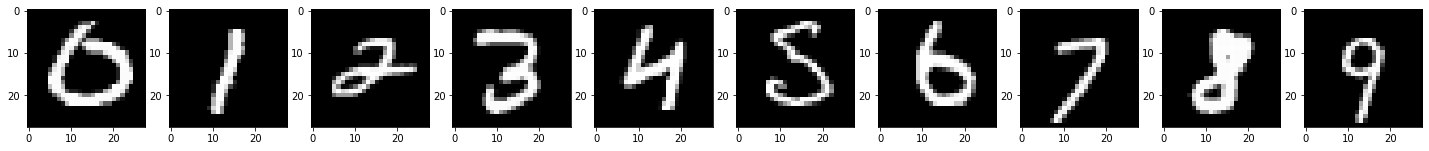

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
  label_indexes = np.where(y_train==i)[0] 
  index = random.choice(label_indexes) 
  img = x_train[index] 
  axs[i].imshow(Image.fromarray(img), cmap='gray') #
plt.show() 

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Размеры
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**





Epoch 1/15
469/469 [==============================] - 15s 13ms/step - loss: 0.5223 - accuracy: 0.9268 - val_loss: 0.0598 - val_accuracy: 0.9792
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0773 - accuracy: 0.9754 - val_loss: 0.0435 - val_accuracy: 0.9848
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0556 - accuracy: 0.9824 - val_loss: 0.0351 - val_accuracy: 0.9880
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0433 - val_accuracy: 0.9864
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0348 - val_accuracy: 0.9899
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0302 - accuracy: 0.9895 - val_loss: 0.0343 - val_accuracy: 0.989

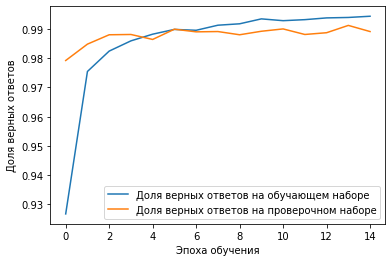

In [ ]:

batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Первый сверточный слов
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
#Второй сверточный слой
model.add(Conv2D(32, 3, padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Пресекаем переобучение
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Пресекаем переобучение
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучение на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                      

**Определение цифр из тестовой выборки**




In [ ]:
#Выбираем номер пример
n = 2022
#Получаем выход сети на этом примере
prediction = model.predict(x_test)

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

313/313 [==============================] - 1s 2ms/step
Выход сети:  [2.11307027e-23 2.43156495e-14 3.94336308e-19 1.00697000e-24
 1.00000000e+00 2.22536504e-19 4.79003749e-18 1.49190510e-17
 2.34446777e-15 1.04179554e-10]
Распознанная цифра:  4
Верный ответ:  4


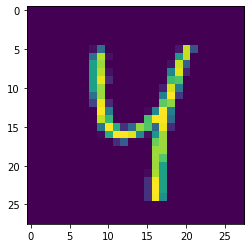

In [ ]:
plt.imshow(x_test[n,:,:,0])

**Определение цифр на реальных фотографиях**


In [ ]:


def change_contrast(img, factor): #Функция для увеличения контрастности 
    def contrast(pixel): #Функция для изменения цвета пикселя
        return 128 + factor * (pixel - 128) 
    return img.point(contrast)

xTestReal = [] 
yTestReal = [] 

for i in range(10):
  img_path = str(i) + '.png' #имя изображения
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))
  img1 = change_contrast(img, factor=8.0) #Увеличиваем контрастность изображения
  xTestReal.append(255 - np.asarray(img1)) #Инвертируем изображение и добавляем в выборку
  yTestReal.append(i) 

xTestReal = np.array(xTestReal) #в Numpy array
yTestReal = np.array(yTestReal) #в Numpy array

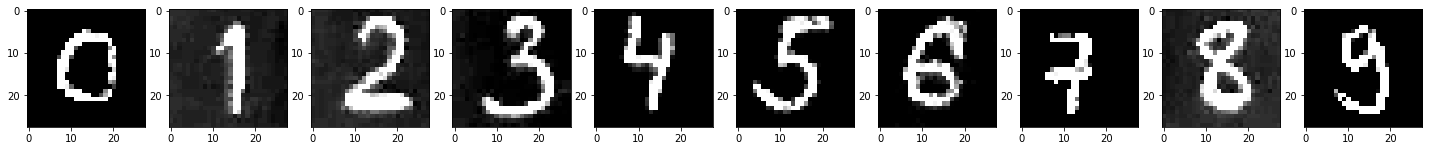

In [ ]:
#Картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray')

plt.show() #Показываем

In [ ]:
#Добавление канала в размерность
xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

In [ ]:
xTestReal.shape 

(10, 28, 28, 1)

In [ ]:
prediction = model.predict(xTestReal) #Классифицируем каждое изображение
for i in range(10): #Проходим по картинкам
  print("Распознанный образ:", np.argmax(prediction[i]), '. Верный ответ', yTestReal[i])

1/1 [==============================] - 0s 53ms/step
Распознанный образ: 0 . Верный ответ 0
Распознанный образ: 1 . Верный ответ 1
Распознанный образ: 2 . Верный ответ 2
Распознанный образ: 3 . Верный ответ 3
Распознанный образ: 4 . Верный ответ 4
Распознанный образ: 5 . Верный ответ 5
Распознанный образ: 8 . Верный ответ 6
Распознанный образ: 7 . Верный ответ 7
Распознанный образ: 8 . Верный ответ 8
Распознанный образ: 9 . Верный ответ 9


# Распознавание изображений из набора данных Cifar10


In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

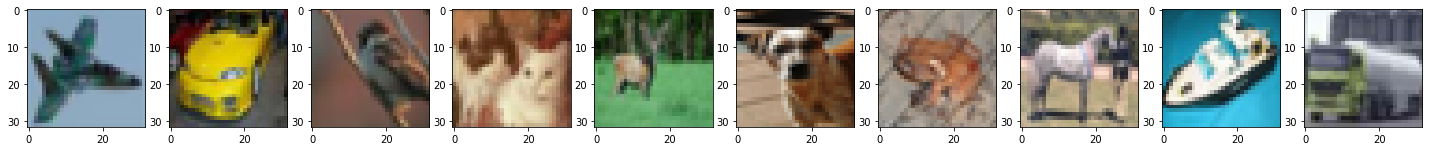

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
  label_indexes = np.where(y_train10==i)[0] 
  index = random.choice(label_indexes) 
  img = x_train10[index] 
  axs[i].imshow(Image.fromarray(img)) 
plt.show() #Показываем изображения

In [ ]:
#one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:

print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**




Epoch 1/20
391/391 [==============================] - 16s 17ms/step - loss: 1.4713 - accuracy: 0.4645 - val_loss: 1.4677 - val_accuracy: 0.4788
Epoch 2/20
391/391 [==============================] - 5s 14ms/step - loss: 1.0260 - accuracy: 0.6335 - val_loss: 0.9305 - val_accuracy: 0.6685
Epoch 3/20
391/391 [==============================] - 6s 14ms/step - loss: 0.8672 - accuracy: 0.6913 - val_loss: 0.7857 - val_accuracy: 0.7235
Epoch 4/20
391/391 [==============================] - 5s 14ms/step - loss: 0.7699 - accuracy: 0.7286 - val_loss: 0.7180 - val_accuracy: 0.7470
Epoch 5/20
391/391 [==============================] - 6s 15ms/step - loss: 0.6986 - accuracy: 0.7543 - val_loss: 0.7463 - val_accuracy: 0.7446
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 0.6485 - accuracy: 0.7734 - val_loss: 0.6629 - val_accuracy: 0.7709
Epoch 7/20
391/391 [==============================] - 6s 14ms/step - loss: 0.6059 - accuracy: 0.7873 - val_loss: 0.5821 - val_accuracy: 0.803

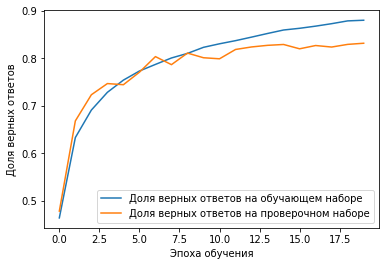

In [ ]:

batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#От переобучения
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#От переобучения
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#От переобучения
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучение на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

#График
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       1

**Определение изображений из тестовой выборки**


In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

type(x_test10)

313/313 [==============================] - 1s 2ms/step


numpy.ndarray

313/313 [==============================] - 1s 3ms/step
Распознанный браз на картинке:  кот


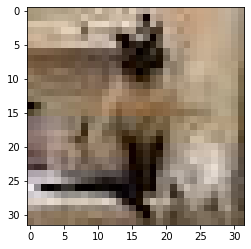

In [ ]:
import cv2
from matplotlib.image import imread
dog = np.asarray(Image.open('dog.png').convert('RGB'))

#plt.imshow(Image.fromarray(dog))
#plt.show
x_test101 = np.append(x_test10, dog)
x_test102 = x_test101.reshape(10001, 32, 32, 3)


pred = model.predict(x_test102)

plt.imshow(Image.fromarray(x_test102[10000]).convert('RGBA'))
plt.show
print("Распознанный браз на картинке: ", classes[np.argmax(pred[10000])])


# x_test_test = x_test10
# x_test_test = np.append(x_test_test, dog)
# print(x_test10.shape, x_test_test.shape)
conv = model.layers[0]


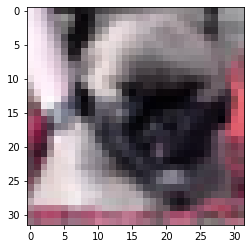

Выход сети:  [2.1083575e-05 6.4464319e-07 2.1383565e-02 2.5033012e-01 6.3292156e-03
 7.1065187e-01 9.0540256e-03 2.2273604e-03 1.0272134e-06 1.0147097e-06]
Распознанный образ:  5
Верный ответ:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Распознанный браз на картинке:  собака


In [ ]:
#Выбираем номер примера
n = 2022

plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

**Определение фотографий из интернета**

In [ ]:
#Выводим для примера картинки по каждому классу

xTestReal10 = [] 
yTestReal10 = [] 

for i in range(10):
  img_path = str(i) + '.jpg' 
  if i == 3:
    img_path = 'dog.png'

  xTestReal10.append(np.asarray(image.load_img(img_path, grayscale=False, target_size=(32, 32)))) #Добавляем изображение в выборку
  yTestReal10.append(i) #Добавляем в y номера классов

xTestReal10 = np.array(xTestReal10) 
yTestReal10 = np.array(yTestReal10) 

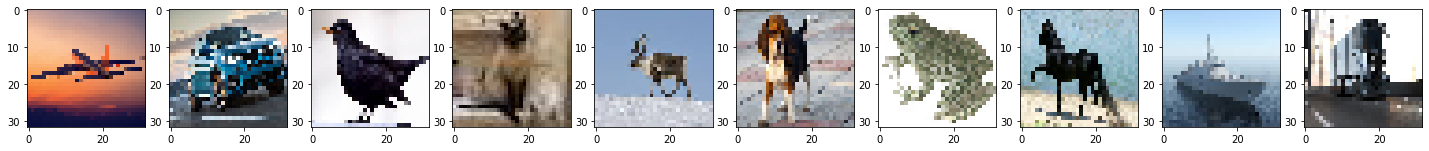

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
  axs[i].imshow(Image.fromarray(xTestReal10[i]).convert('RGB')) 

plt.show() #Показываем изображения

In [ ]:
xTestReal10.shape

(10, 32, 32, 3)

In [ ]:
prediction = model.predict(xTestReal10) 
for i in range(10): 

  print("Распознанный образ:", classes[np.argmax(prediction[i])])
  print('Верный ответ:', classes[yTestReal10[i]])
  print()

1/1 [==============================] - 0s 134ms/step
Распознанный образ: самолет
Верный ответ: самолет

Распознанный образ: автомобиль
Верный ответ: автомобиль

Распознанный образ: птица
Верный ответ: птица

Распознанный образ: кот
Верный ответ: кот

Распознанный образ: олень
Верный ответ: олень

Распознанный образ: собака
Верный ответ: собака

Распознанный образ: лягушка
Верный ответ: лягушка

Распознанный образ: лошадь
Верный ответ: лошадь

Распознанный образ: корабль
Верный ответ: корабль

Распознанный образ: грузовик
Верный ответ: грузовик



## Распознавание авто трех производителей

In [ ]:
train_path = '/content/drive/MyDrive/cars/' #Папка с папками с машинами
batch_size = 25 #Размер выборки
img_width = 96 
img_height = 54

In [ ]:
#Генератор изображений для аугментации данных
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем
    width_shift_range=0.1, #Двигаем по ширине 
    height_shift_range=0.1, #Двигаем по высоте 
    zoom_range=0.1, #Зумируем изображения
    horizontal_flip=True, #Отзеркаливание
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.1 #Обучающая и тестовая выборки
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', # Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание
    subset='training' #как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical',
    shuffle=True, 
    subset='validation' # валидационный набор
)

Found 3086 images belonging to 3 classes.
Found 341 images belonging to 3 classes.


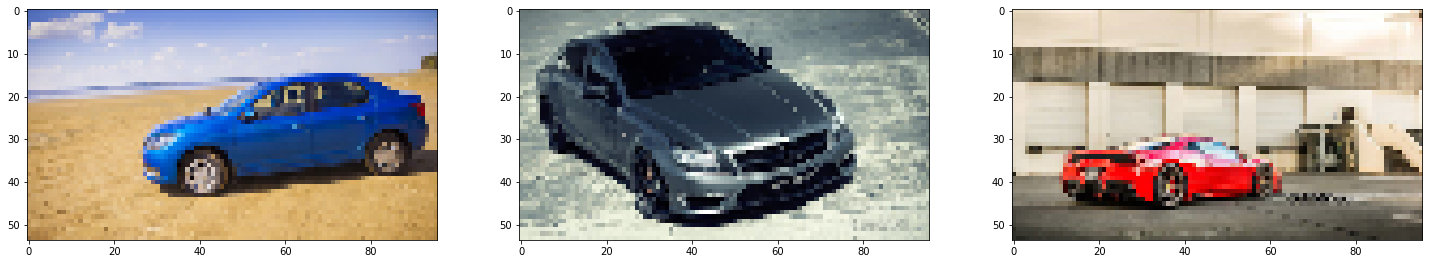

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) 
for i in range(3): 
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #случайное фото
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
#Второй сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Третий сверточный слой
model.add(Conv2D(300, (3, 3), padding='same', activation='relu'))

model.add(Dropout(0.2))
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.2))
#Пятый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.2))
#Слой преобразования двумерных данных в одномерные 
model.add(Flatten())
#Полносвязный слой
model.add(Dense(2048, activation='relu'))
#Полносвязный слой
model.add(Dense(3096, activation='relu'))
#Вызодной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45


<ipython-input-24-f21dcfb58631>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


123/123 [==============================] - 35s 269ms/step - loss: 0.9943 - accuracy: 0.4770 - val_loss: 0.9612 - val_accuracy: 0.5169
Epoch 2/45
123/123 [==============================] - 32s 262ms/step - loss: 0.9189 - accuracy: 0.5400 - val_loss: 0.9154 - val_accuracy: 0.5692
Epoch 3/45
123/123 [==============================] - 32s 260ms/step - loss: 0.8938 - accuracy: 0.5596 - val_loss: 0.9273 - val_accuracy: 0.5600
Epoch 4/45
123/123 [==============================] - 32s 263ms/step - loss: 0.8607 - accuracy: 0.5809 - val_loss: 0.8777 - val_accuracy: 0.5815
Epoch 5/45
123/123 [==============================] - 32s 259ms/step - loss: 0.8474 - accuracy: 0.6014 - val_loss: 0.8782 - val_accuracy: 0.5754
Epoch 6/45
123/123 [==============================] - 32s 263ms/step - loss: 0.7871 - accuracy: 0.6384 - val_loss: 0.8282 - val_accuracy: 0.6338
Epoch 7/45
123/123 [==============================] - 32s 263ms/step - loss: 0.7860 - accuracy: 0.6325 - val_loss: 0.8998 - val_accuracy: 0.6

In [ ]:
model.save_weights('/content/drive/MyDrive/weights.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 96, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 96, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 32, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 32, 256)       590080    
                                                                 
 dropout (Dropout)           (None, 18, 32, 256)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 32, 256)       590080    
                                                        

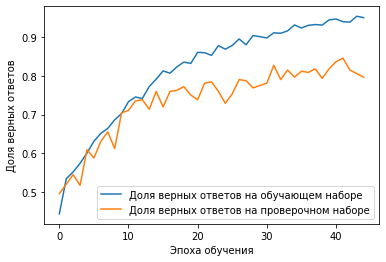

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

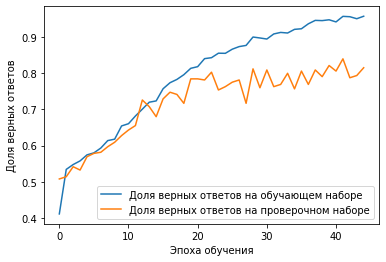

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

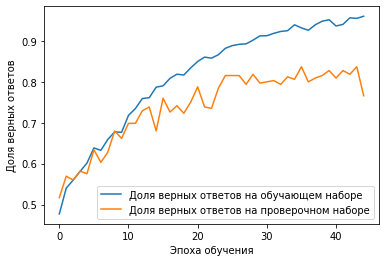

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
x = model.predict()

# Смотрим, что внутри сверточных слоев


In [ ]:
conv = model.layers[0]

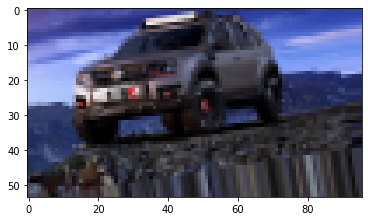

In [ ]:
x = validation_generator.next()[0][0]
plt.imshow(x)
# x = x[None]
# x.shape
# np.argmax(model.predict(x))


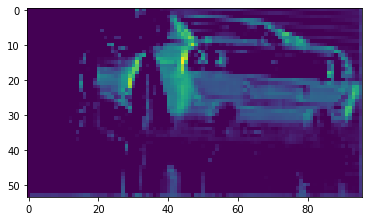

In [ ]:
n_filter = 18
plt.imshow(conv(x)[0,:,:,n_filter])

In [ ]:
datagen1 = ImageDataGenerator(
    rescale=1. / 255, 
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode='nearest', 
    validation_split=0.1 
)

In [ ]:
my_path = '/content/drive/MyDrive/test_1/'
# проверочная выборка
validation_generator1 = datagen1.flow_from_directory(
    my_path, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True 
    
)

Found 1 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.preprocessing import image
from numpy import asarray
img = image.load_img('/content/drive/MyDrive/test_2/orig.jpg', target_size = (img_height, img_width))
#img.resize(img_height, img_width)
y1 = asarray(img)
y1 = y1[None]
print(y1.shape)
answ1 = np.argmax(model.predict(y1))
print(answ1)


(1, 54, 96, 3)
1/1 [==============================] - 0s 29ms/step
1


(1, 54, 96, 3)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 18ms/step
Mercedes


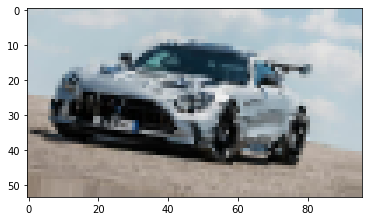

In [ ]:
import random
car_num = random.randint(0, 24)

y = validation_generator1.next()[0][0]
y = y[None]
print(y.shape)
print(type(y))
plt.imshow(y[0])
answ = np.argmax(model.predict(y))
if answ == 0:
  print('Ferarri')
if answ == 1:
  print('Mercedes')
if answ == 2:
  print('renault')

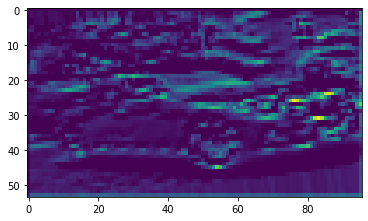

In [ ]:
n_filter = 8
plt.imshow(conv(y)[0,:,:,n_filter])

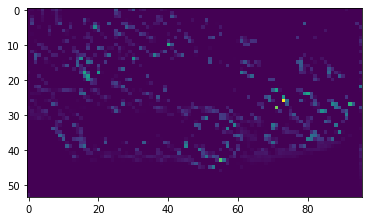

In [ ]:
n_filter = 1
plt.imshow(conv(y)[0,:,:,n_filter])

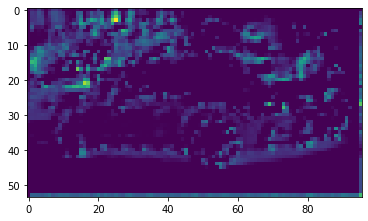

In [ ]:
n_filter = 2
plt.imshow(conv(y)[0,:,:,n_filter])

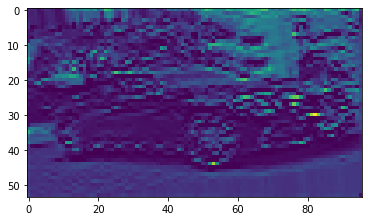

In [ ]:
n_filter = 3
plt.imshow(conv(y)[0,:,:,n_filter])

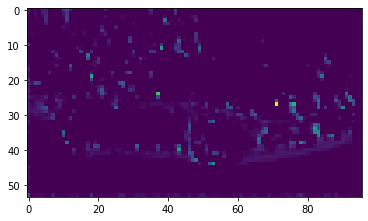

In [ ]:
n_filter = 4
plt.imshow(conv(y)[0,:,:,n_filter])

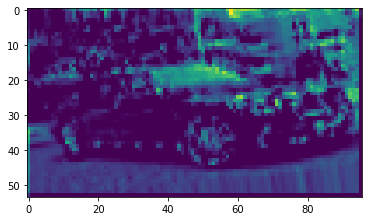

In [ ]:
n_filter = 27
plt.imshow(conv(y)[0,:,:,n_filter])

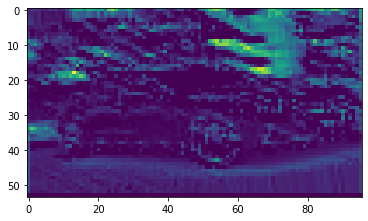

In [ ]:
n_filter = 39
plt.imshow(conv(y)[0,:,:,n_filter])

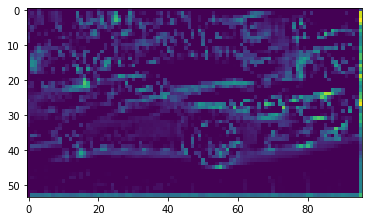

In [ ]:
n_filter = 251
plt.imshow(conv(y)[0,:,:,n_filter])